# Transposed Tones:

Transposed tones were used in:

<i>Oxenham AJ, Bernstein JGW, Penagos H. Correct tonotopic representation is necessary for complex pitch perception. Proceedings of the National Academy of Sciences. 2004;101(5):1421-1425. doi:10.1073/pnas.0306958101</i> 

to result in comparable temporal coding at a different "place" in the cochlea. These transposed tones are created here using functions I've written in `resynthesize.py` and `signal_processing.py`. 

&copy; <i>Andrew Sivaprakasam 2021</i>

## Imports & Formatting:

In [1]:
from signal_processing import pure_tone_complex, sound, magphase, get_spect
import matplotlib.pyplot as plt
from scipy.signal import spectrogram as sp
import scipy as scip
import numpy as np

#Formatting (to center plots):
from IPython.display import display, HTML

CSS = """
.output {
    align-items: center;
}
"""

HTML('<style>{}</style>'.format(CSS))

## Parameters and Stimulus Generation:

In [2]:
fs = 44100
fc = 4e3;
freq_Hz = [440];
dur_sec = 1;
mags = [1];
phi = [0];

F_0 = pure_tone_complex(freq_Hz, fs, dur_sec, mags, phi)
env = np.less(0,F_0[1])*F_0[1];


car = pure_tone_complex([fc],fs,dur_sec,mags,phi);
sos = scip.signal.butter(4,.2*fc,'low',fs = fs, output = 'sos');
env = scip.signal.sosfilt(sos,env);


stim = env*car[1];

## Plotting Waveform:

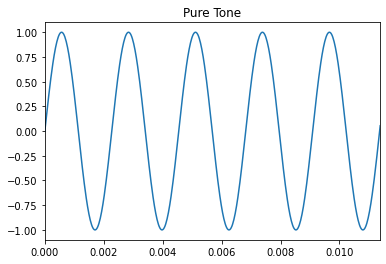

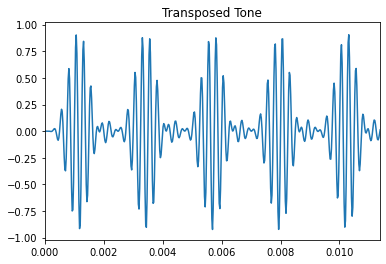

In [3]:
plt.figure()
plt.plot(F_0[0],F_0[1])
plt.xlim([0/440,5/440])
plt.title('Pure Tone');

plt.figure()
plt.plot(F_0[0],stim)
plt.xlim([0/440,5/440])
plt.title('Transposed Tone');

## Plotting Spectrogram:

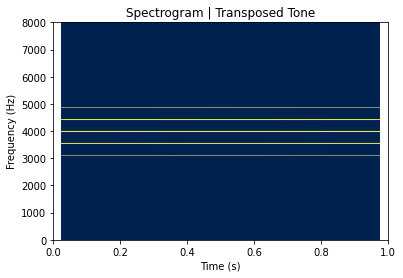

In [4]:
get_spect(stim, fs, DR = 220, BW = 80, xlim = [0,1], ylim = [0,8e3], 
          colormap = 'cividis', title = 'Spectrogram | Transposed Tone');

## Playing Sound:

In [5]:
sound(stim,fs,fname = 'transposed.wav',savefile = 1)
sound(.5*F_0[1],fs,fname = 'pure_440.wav',savefile = 1)